-Notebook for modeling Apple prices / predictions

In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt



In [32]:
AAPL = "/Users/davidhoffman/desktop/stocks_download/AAPL_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(AAPL)

In [33]:
#Making sure date is in datetime
df['Date'] = pd.to_datetime(df.Date)

In [34]:
#Setting the date as the index
df.set_index('Date', inplace=True)

In [35]:
#Only keep closing price of the day
#df.drop(['Open','High','Low'], axis = 1, inplace = True)
df.drop(['Name'], axis = 1, inplace = True)

In [36]:
#Create a lag of 1

df['lag_close_1'] = df.Close.shift(1) ## shift down
#df.gdp.drop(df.gdp.shape[0] - 1,inplace = True) ## removing the last row

In [37]:
#rolling mean of 3 days
df['rolling_close_3'] = df.Close.rolling(window=3, center=False).mean()

In [38]:
df['rolling_close_25'] = df.Close.rolling(window=25, center=False).mean()
df['rolling_close_100'] = df.Close.rolling(window=100, center=False).mean()

In [39]:
#create expanding mean - averaging all points until today/time point
df['expanding_mean'] = df.Close.resample('D').sum().expanding().mean()
#returned empty column with, not D

In [40]:
#create exponenitally weighted mean
df['exp_weighted_mean'] = df.Close.resample('D').sum().ewm(span=30).mean()


In [41]:
df.head()

,Open,High,Low,Close,Volume,lag_close_1,rolling_close_3,rolling_close_25,rolling_close_100,expanding_mean,exp_weighted_mean
Date,,,,,,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,NaN,NaN,NaN,NaN,10.680000,10.680000
2006-01-04,10.73,10.85,10.64,10.71,155225609,10.68,NaN,NaN,NaN,10.695000,10.695500
2006-01-05,10.69,10.70,10.54,10.63,112396081,10.71,10.673333,NaN,NaN,10.673333,10.672195
2006-01-06,10.75,10.96,10.65,10.90,176139334,10.63,10.746667,NaN,NaN,10.730000,10.734964
2006-01-09,10.96,11.03,10.82,10.86,168861224,10.90,10.796667,NaN,NaN,10.756000,10.766450


In [42]:
#Create autoregressive model, moving average model, arima model
ar1 = ARMA(df.Close, (1,0),  dates = df.index).fit()
ma1 = ARMA(df.Close, (0, 1), dates = df.index).fit()
#ar1ma1 = ARIMA(df.Close.dropna().values, (1,1,1)).fit()
#p is the order (number of time lags) of the autoregressive model, 
#d is the degree of differencing (the number of times the data have had past values subtracted),
#q is the order of the moving-average model

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [43]:
ar_predictions = ar1.predict()
ma_predictions = ma1.predict()


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


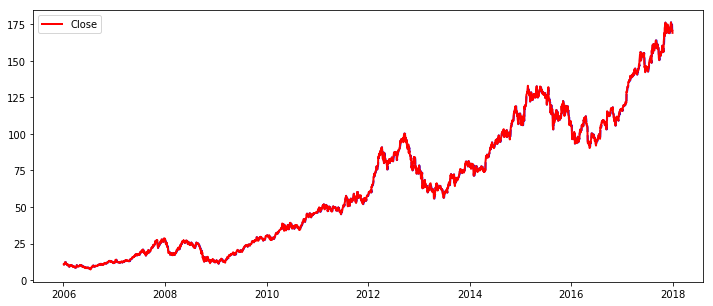

In [44]:
#plot 

date_ticks = df.index

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], ar_predictions[1:], lw=2, color='blue', ls='dashed')
ax.plot(date_ticks, df.Close, lw=2, color='red', ls='solid')
plt.legend()
plt.show()
#fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(date_ticks[1:], udiff, lw=2, color='grey', ls='dashed',label='Data')
#ax.plot(date_ticks[1:], predictions, lw=2, color='darkred',label='Fit')
#plt.legend()
#plt.show()



In [45]:
df.Close.shape[0], ar_predictions.shape[0]

(3019, 3019)

In [46]:
ar_predictions.tail(), df.Close.tail()

(Date
 2017-12-22    175.01
 2017-12-26    175.01
 2017-12-27    170.57
 2017-12-28    170.60
 2017-12-29    171.08
 dtype: float64, Date
 2017-12-22    175.01
 2017-12-26    170.57
 2017-12-27    170.60
 2017-12-28    171.08
 2017-12-29    169.23
 Name: Close, dtype: float64)

In [47]:
ar1ma1 = ARIMA(df.Close.dropna().values, (1,2,1)).fit()

ar1ma1_predictions = ar1ma1.predict()

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [51]:
##insert two nans begninng of arima preds list, run cell twice
#arima_preds=list(ar1ma1_predictions)
arima_preds.insert(0,np.nan)

In [52]:
#create a new column in dataframe of predicted points
df["arima_preds"]=arima_preds

In [53]:
df.shape

(3019, 12)

In [54]:
#creating a new arima model specifying a start and end date

arima_preds_2 = ar1ma1.predict(start=2, end=3020)

df2=pd.DataFrame(arima_preds_2)

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [55]:
df2.tail(5)

,0
3014,4.441409
3015,0.071613
3016,-0.368145
3017,1.909677
3018,0.042824


In [56]:
#renaming column
df2.columns=["price"]

In [57]:
#trying to change the column from the change in price to include the existing price plus the change

#prices = []
#prev_price = [10.68]
#for i in df2.price:
#    i = prev_price[0] + i
#    prev_price[0]=i
#    prices.append(i)
#    print (i)
    
    
    

In [58]:
df

,Open,High,Low,Close,Volume,lag_close_1,rolling_close_3,rolling_close_25,rolling_close_100,expanding_mean,exp_weighted_mean,arima_preds
Date,,,,,,,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,NaN,NaN,NaN,NaN,10.680000,10.680000,NaN
2006-01-04,10.73,10.85,10.64,10.71,155225609,10.68,NaN,NaN,NaN,10.695000,10.695500,NaN
2006-01-05,10.69,10.70,10.54,10.63,112396081,10.71,10.673333,NaN,NaN,10.673333,10.672195,0.000033
2006-01-06,10.75,10.96,10.65,10.90,176139334,10.63,10.746667,NaN,NaN,10.730000,10.734964,0.053817
2006-01-09,10.96,11.03,10.82,10.86,168861224,10.90,10.796667,NaN,NaN,10.756000,10.766450,-0.191066
2006-01-10,10.89,11.70,10.83,11.55,570088246,10.86,11.103333,NaN,NaN,10.888333,10.932633,0.082624
2006-01-11,11.98,12.11,11.80,11.99,373548882,11.55,11.466667,NaN,NaN,11.045714,11.128051,-0.502687
2006-01-12,12.14,12.34,11.95,12.04,320201966,11.99,11.860000,NaN,NaN,11.170000,11.278495,-0.216461
2006-01-13,12.14,12.29,12.09,12.23,194153393,12.04,12.086667,NaN,NaN,11.287778,11.421136,0.140202


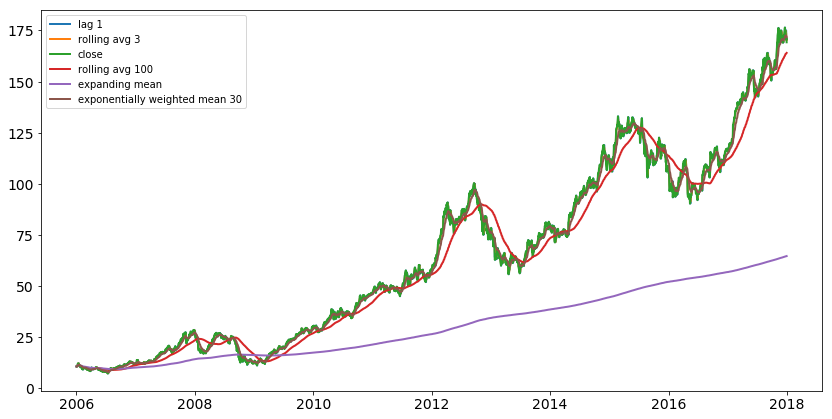

In [59]:
plt.figure(figsize=(14,7))

plt.plot(date_ticks, df.lag_close_1 ,lw=2,label='lag 1')
plt.plot(date_ticks, df.rolling_close_3, lw=2,label='rolling avg 3')
plt.plot(date_ticks, df.Close, lw=2,label='close')
plt.plot(date_ticks, df.rolling_close_100, lw=2,label='rolling avg 100')
plt.plot(date_ticks, df.expanding_mean, lw=2,label='expanding mean')
plt.plot(date_ticks, df.exp_weighted_mean, lw=2,label='exponentially weighted mean 30')


plt.tick_params(labelsize=14)
plt.legend()

plt.show();